Steps involved
 - Get the Data
 - Data Exporation for insights
 - Prepare the data for ML algorithms
 - Select and Train a Model
 - Fine-Tune the model

Extras 
 - Full pipeline with full preparation and prediction
 - Model persistance using joblib
 - Example SciPy for RandomizedSearchCV



# Get The Data

In [1]:
import os
import pandas as pd


In [2]:
housing=pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20640 entries
total_bedrooms has 20433 non-null values and (20460-20433)=207 null values which needs to be dealt with
All the values are numerical except ocean_proximity. its type is object. Loading the top few values of this column can tell us what 
this column contains. It could be text values


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Notice that the values in this column are repetetive, it could be categorical data. 

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The 25% (1st quartile), 50% (median) and 75% (3rd quartile) shows the percentage in which the observation fall, 
for ex: less than 25% of the housing_median_age fall below 18

Another way to check the type of data is by drawing histogram for each numerical data

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import os
figures_filepath=os.path.join("images","saved_figures")

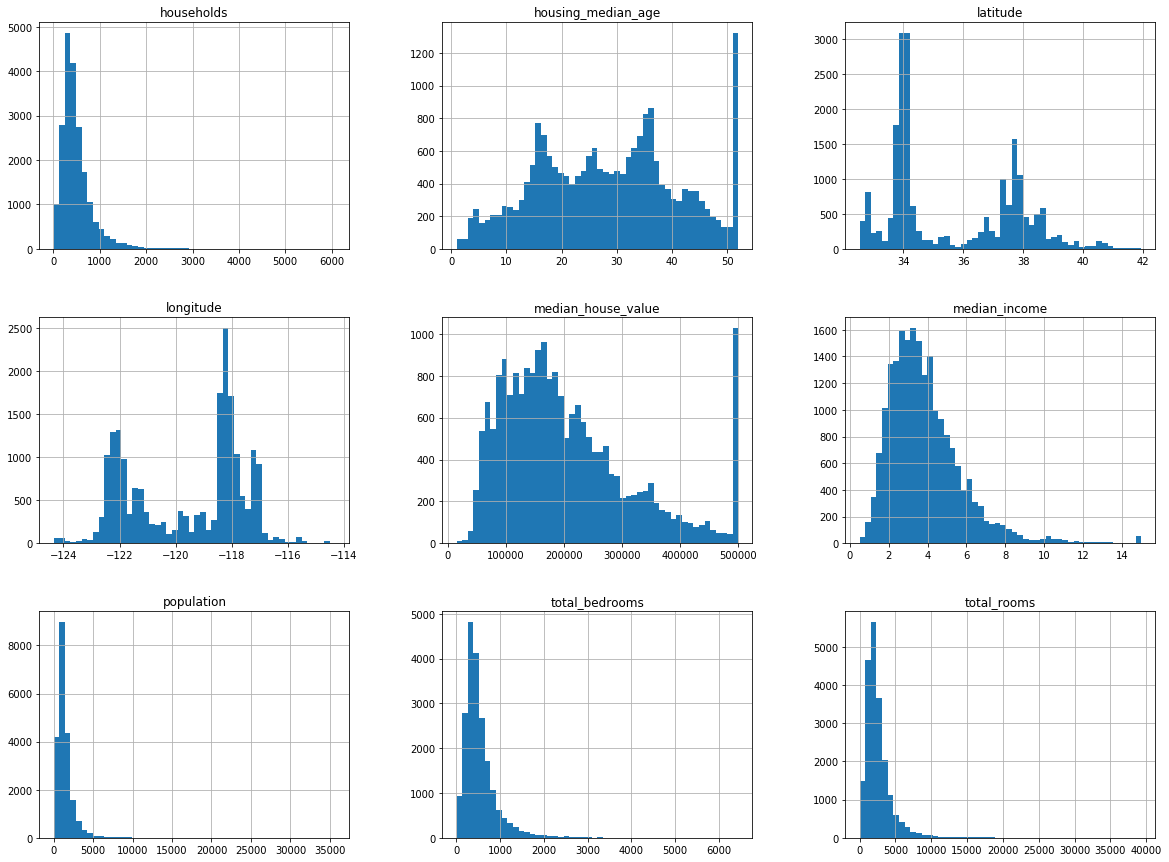

In [9]:

housing.hist(bins=50,figsize=(20,15))
#plt.savefig("attribute_histogram_plots")

plt.savefig(os.path.join(figures_filepath ,"attribute_histogram_plots"))

plt.show()

slightly over 800 districts have a median_house_value equal to about $500,000


Few points to note here:
    - the median_income attribute does not look like it is expressed in USD($). Th data has been scaled and capped at 
    15.001 for higher median incomes and 0.5 for lower median incomes 
    - the house median age and house median value are also capped. The house median value is the target value (or labels).
    If the house median values goes beyond certain value. That has to be taken into consideration and dealt with. (if the 
    business demands that values beyond the capped limit is also to be considered. Sometimes these extreme values acts as
    outliers.
    - many attributes are 'tail' heavy i.e., they extend much farther to the righ from the median than to the left. 
    This may make it harder for some machine learning algorithms.These needs to be transformed to have a bell-shaped 
    distribution.

In [10]:
# Next create a test set and look at it ..once the model is in almost ready condition

In [11]:
import numpy as np

# create a reproducabilty factor using same seed
np.random.seed(42)


In [12]:

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
#X_train,X_test, y_train, y_test =train_test_split(housing, test_size=0.2,random_state =42)

In [13]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [14]:
housing['median_income'].head(20)
#housing['median_income'].where(housing['median_income']<5.0,print(housing['median_income']),inplace=True

0     8.3252
1     8.3014
2     7.2574
3     5.6431
4     3.8462
5     4.0368
6     3.6591
7     3.1200
8     2.0804
9     3.6912
10    3.2031
11    3.2705
12    3.0750
13    2.6736
14    1.9167
15    2.1250
16    2.7750
17    2.1202
18    1.9911
19    2.6033
Name: median_income, dtype: float64

In [15]:
housing['median_income'].where(housing['median_income']>6).dropna().shape

(2362,)

if we notice, almost 2362 entries have median_income with values more than 6 (if bins are considered) still a considerable 
amount of values exist above 6.  
Remove 'dropna().shape' and see the list of values

In [16]:
housing['median_income'].where(housing['median_income']>6).max()

15.0001

In [17]:
housing['median_income'].where(housing['median_income']>0).min()

0.4999

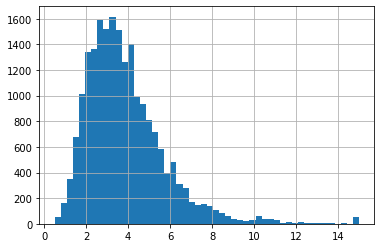

In [18]:
housing['median_income'].hist(bins=50)
plt.show()

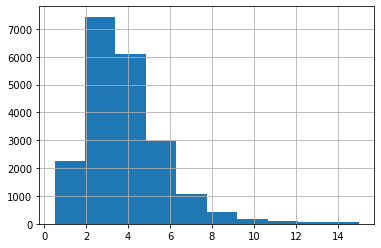

In [19]:
housing['median_income'].hist()
plt.show()

Most of the median income values have 2 to 5 (tens of thousands of dollars) and some median_income go far beyond 6. 
To limit the number of income categories we divide the median_income by 1.5 and rounding up using ceil (to have discrete categories) and then merging all the categories above 5 into category 5. (This will also give bell-shaped curve)



In [20]:
housing['income_cat']=np.ceil(housing['median_income']/1.5)
# label above 5 as 5


In [21]:
housing['income_cat'].max()

11.0

In [22]:
housing['income_cat'].head(10)

0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
5    3.0
6    3.0
7    3.0
8    2.0
9    3.0
Name: income_cat, dtype: float64

In [23]:
housing['income_cat'].where(housing['income_cat']>5.0).dropna().head(10)

0      6.0
1      6.0
128    6.0
131    8.0
134    6.0
135    6.0
137    6.0
154    6.0
155    6.0
158    6.0
Name: income_cat, dtype: float64

In [24]:
type(housing['income_cat'])

#housing['income_cat'].where(housing['income_cat']<5.0)

pandas.core.series.Series

In [25]:
# we apply series.where(condition NOT satisfied?, do this) 

# merging all the categories greater than 5 into category 5: by Method-1 and Method-2

## Method-1 using pd.cut --- here the labels are int
# housing["income_cat"] = pd.cut(housing["median_income"],
#                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
#                               labels=[1, 2, 3, 4, 5])
#

In [26]:
# if it was an np array we could use np.where like the ex
#a = np.arange(10)
#a
#np.where(a > 4,a, 10*a)
# i.e np.where(condition met? if yes do this, else do this)

In [27]:
# Method-2: here the labels are floats
housing['income_cat'].where(housing['income_cat'] < 5.0, 5.0 , inplace=True)

# this means wherever value is "> 5" it is replaced by 5.0

In [28]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

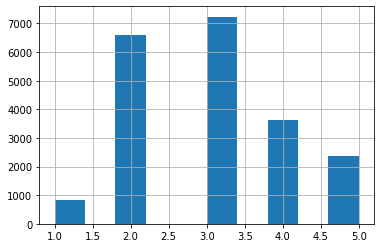

In [29]:
housing['income_cat'].hist()
plt.show()

In [30]:
# If the dataset is too large, it is ok to use random sampling method.If not, there is a risk of significant sample bias and
# instead use stratified sampling

# Example of Stratified sampling: In a class of 100 students(60 girls and 40 boys), if we want to choose 10 persons
# to ask some survey questions, it would be fair to maintain this ratio and choose 6 girls and 4 boys.
# (correct representative of the female and male population)
# The population is divided into homogeneous subgroups called strata. Right number of instances is sampled from each stratum so 
# as to have correct representation of the population
# Random sampling : If the selection is done randomly, the chance that all boys, or all girls or imbalanced ratio are chosen 
# this would create bias and give improper results.


In [31]:
# make sure that the test set is representative of various categories of income in the whole dataset


In [32]:
#for strattified sampling based on the income category, we can use stratifiedshufflesplit class

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])


In [34]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [35]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [36]:
# test set generation is a critical part  of machine learning project which cannot be neglected.
# It will be useful when we come across cross-validation

In [37]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

In [38]:
train_set, test_set =train_test_split(housing, test_size=0.2,random_state=42)

compare_props=pd.DataFrame({
    "Overall":income_cat_proportions(housing),
    "Stratified":income_cat_proportions(strat_test_set),
    "Random":income_cat_proportions(test_set)
}).sort_index()

In [39]:
compare_props

,Overall,Stratified,Random
1.0,0.039826,0.039729,0.040213
2.0,0.318847,0.318798,0.324370
3.0,0.350581,0.350533,0.358527
4.0,0.176308,0.176357,0.167393
5.0,0.114438,0.114583,0.109496


In [40]:
# Error percentages
# Error % = ((obtained result-actual value)/actual value)*100
# So to have new column in the table of comparision ("Random % Error") 
compare_props["Random % error"]= ((compare_props["Random"]-compare_props["Overall"])/compare_props["Overall"])*100

In [41]:
compare_props

,Overall,Stratified,Random,Random % error
1.0,0.039826,0.039729,0.040213,0.973236
2.0,0.318847,0.318798,0.324370,1.732260
3.0,0.350581,0.350533,0.358527,2.266446
4.0,0.176308,0.176357,0.167393,-5.056334
5.0,0.114438,0.114583,0.109496,-4.318374


In [42]:
#similarly "Stratified % Error"
compare_props["Stratified % error"]= ((compare_props["Stratified"]-compare_props["Overall"])/compare_props["Overall"])*100

In [43]:
compare_props

,Overall,Stratified,Random,Random % error,Stratified % error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [44]:
# So it can be seen that stratified sampling gives very less error percentage compared to 
# random sampling with respect to actual values

In [45]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0


In [46]:
# now removing the income_cat to be back to its original state. Removing the column from two tables
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


C:\Users\SonyTF\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [47]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


# Data Visualization for more data insights

In [48]:
# we need to make sure that a test set(strat_test_set) is set aside and that we are exploring on the 
# training set (strat_train_set)
# If the data is very large, we need to have exploration set to make manipulations quick and fast. Here the set is small so we 
# use the full set

# make copy so as to not disturb the training set

In [49]:
housing =strat_train_set.copy()

In [50]:
# Visulaizing Geographical data: since latitude and longitude are given, its a good idea to draw scatter plot to see
# all the districts to visuslize the data

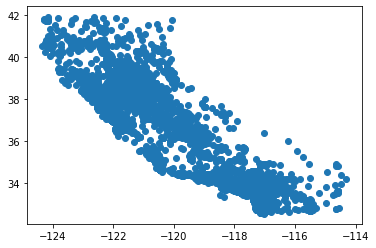

In [51]:
plt.scatter(housing['longitude'],housing['latitude'])
plt.show()

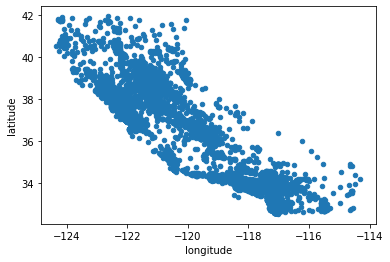

In [52]:
# the other way of plotting is--- the difference is with x and y labels
housing.plot(kind='scatter',x='longitude',y='latitude')
plt.show()

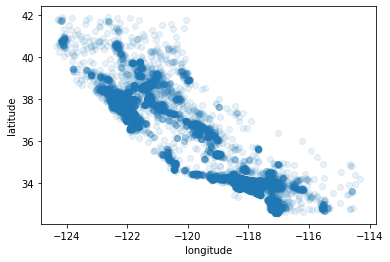

In [53]:
plt.scatter(housing['longitude'],housing['latitude'],alpha=0.1)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

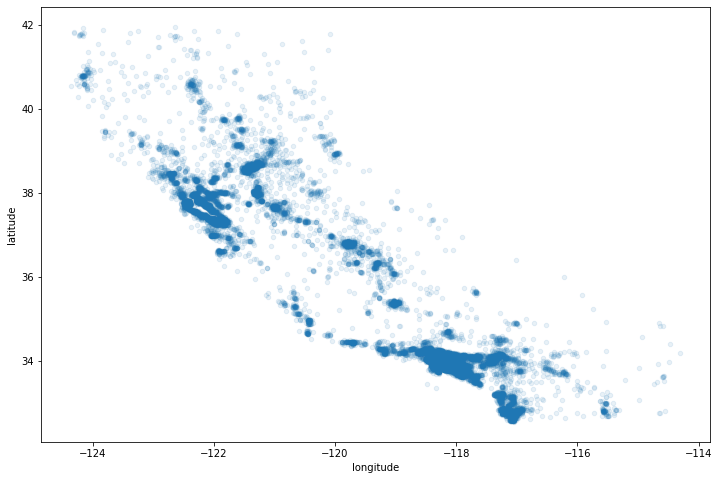

In [54]:
# or 
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,figsize=(12,8))
plt.show()

In [55]:
# The high-density areas are shown with the blue colored accumulation.
# Now drawing the plot with cirles
# radius of each circle represents districts population (option s)
# color represents the price 
# cmap : a predefined color ma called jet , which ranges from low value to high prices


In [56]:
housing["population"].head(5)

17606     710.0
18632     306.0
14650     936.0
3230     1460.0
3555     4459.0
Name: population, dtype: float64

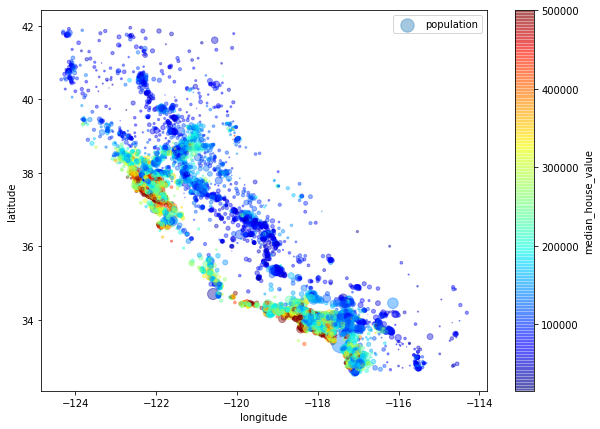

In [57]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
#plt.savefig("housing_prices_scatterplot")
plt.savefig(os.path.join(figures_filepath ,"housing_prices_scatterplot"))
plt.show()

In [58]:
#HOUSING_PATH
#image_file_path=os.path.join(HOUSING_PATH,"images")
image_file=os.path.join("images",'california.png')


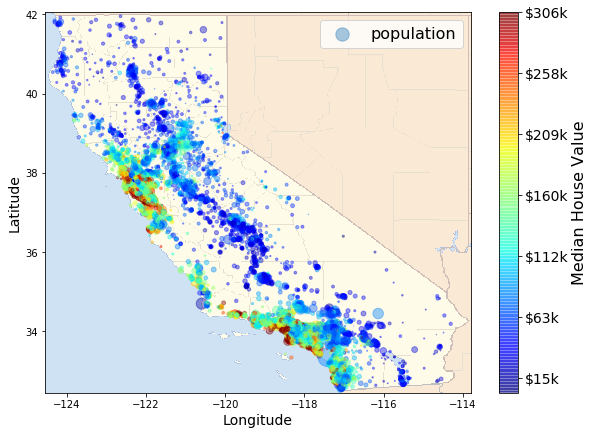

In [59]:
import matplotlib.image as mpimg

california_img=mpimg.imread(image_file)
ax=housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=False,
    sharex=False)
plt.imshow(california_img,extent=[-124.55, -113.80, 32.45, 42.05],alpha=0.5,cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
#plt.savefig("california_housing_prices_plot")
plt.savefig(os.path.join(figures_filepath ,"california_housing_prices_plot"))
plt.show()

Noted points:
    - the housing prices depends on the location and to the population density
    - it will be a good idea to use "clustering algorithm" to detect the main clusters and to add new features that 
      measure the proximity to the cluster centers
    

In [60]:
# looking for correlations: Since the data is too large, we compute the standard correlation coeeficient(Pearsons'R)
# between every pair of attributes using the corr() method:


In [61]:
corr_matrix=housing.corr()

In [62]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [63]:
# looking at how each attribute correlate with the median_house_value

In [64]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

C:\Users\SonyTF\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\SonyTF\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


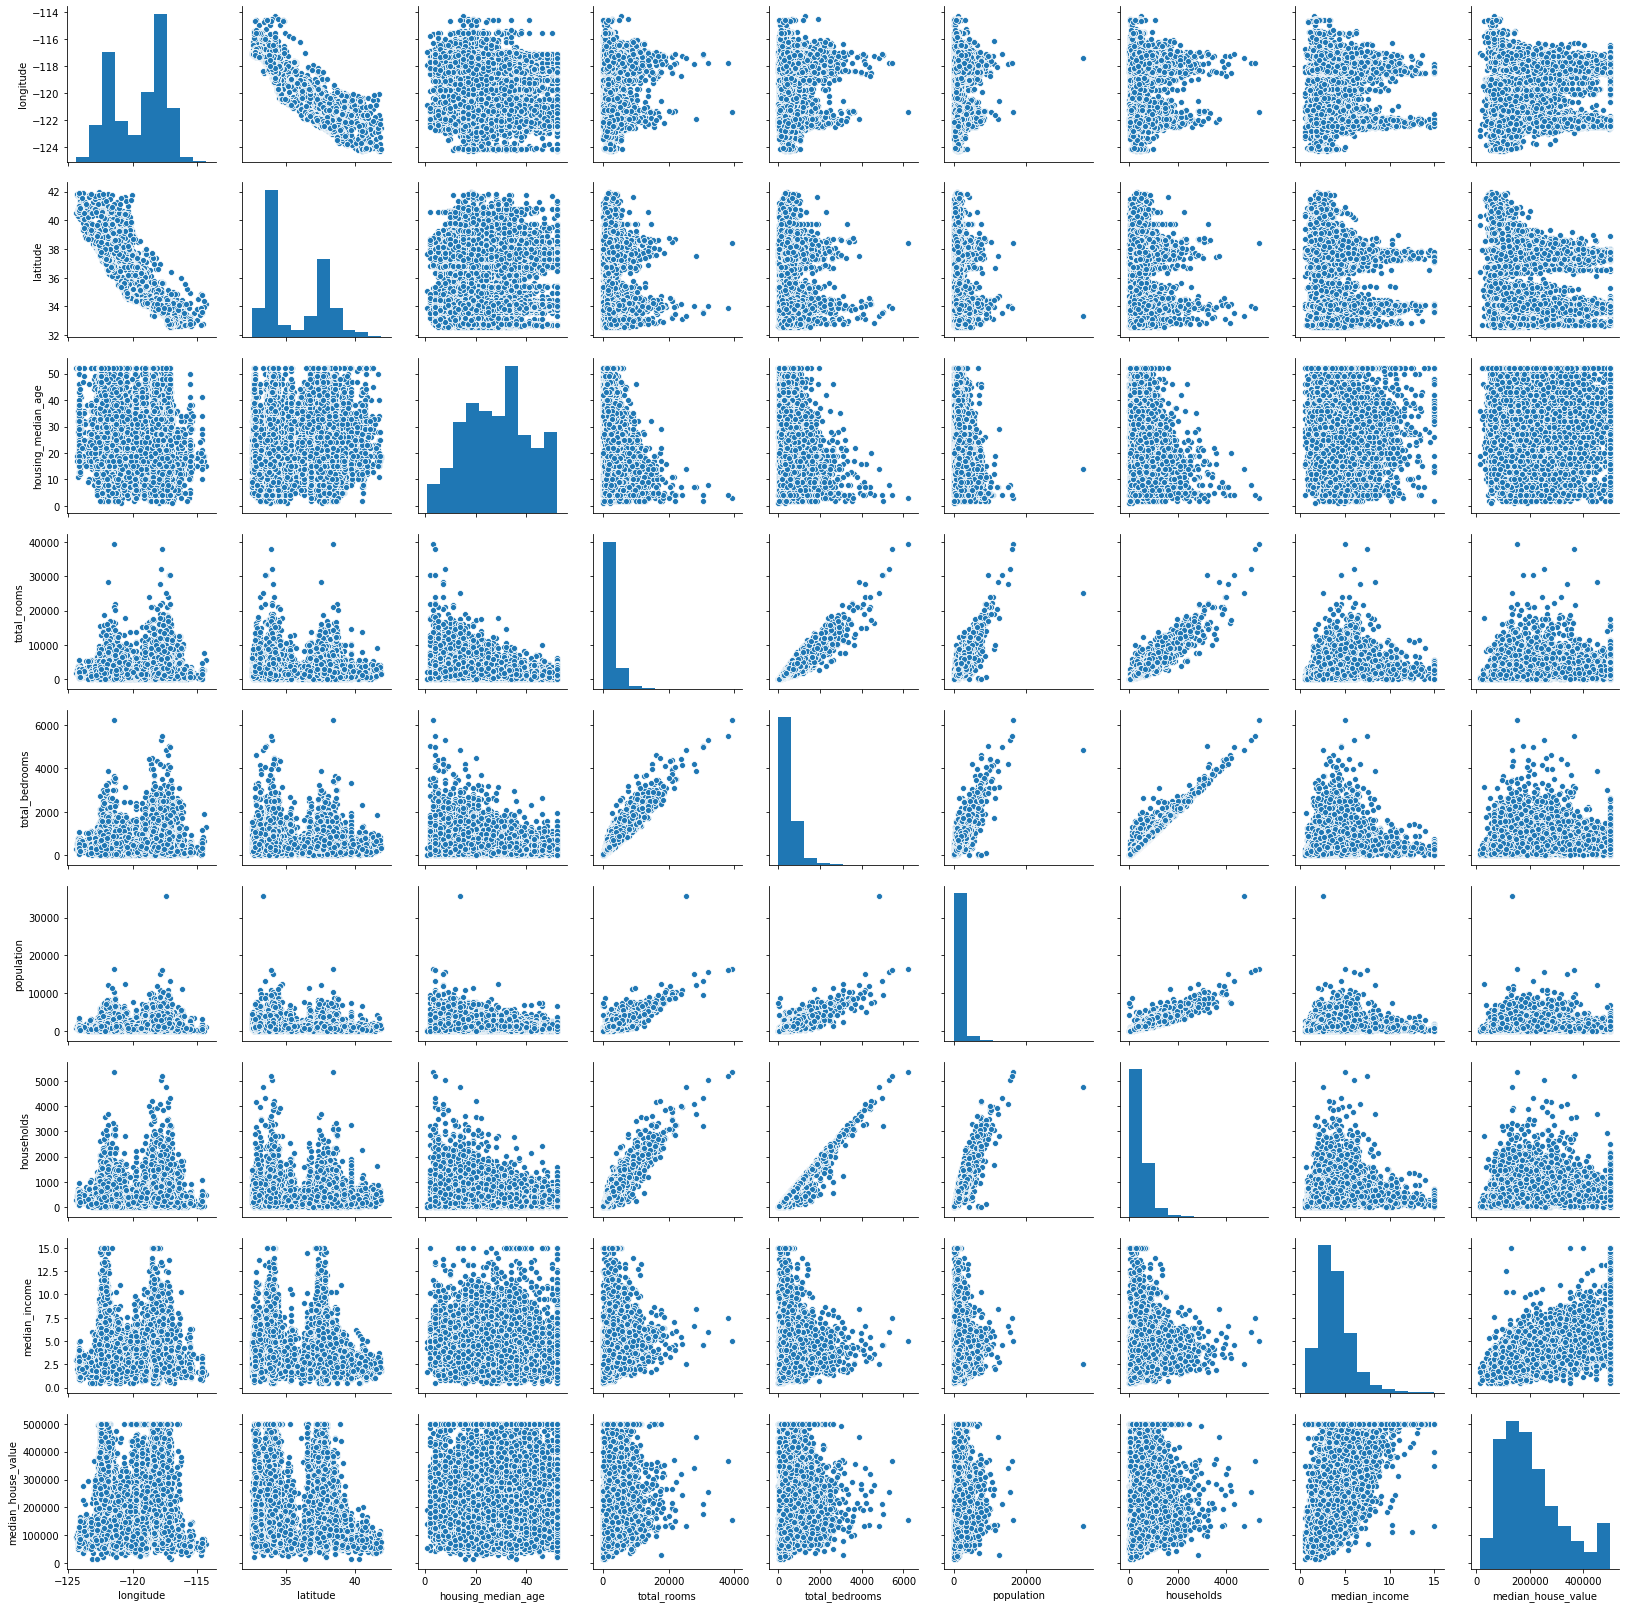

In [65]:
import seaborn as sns
sns.pairplot(housing)
plt.show()

In [66]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]


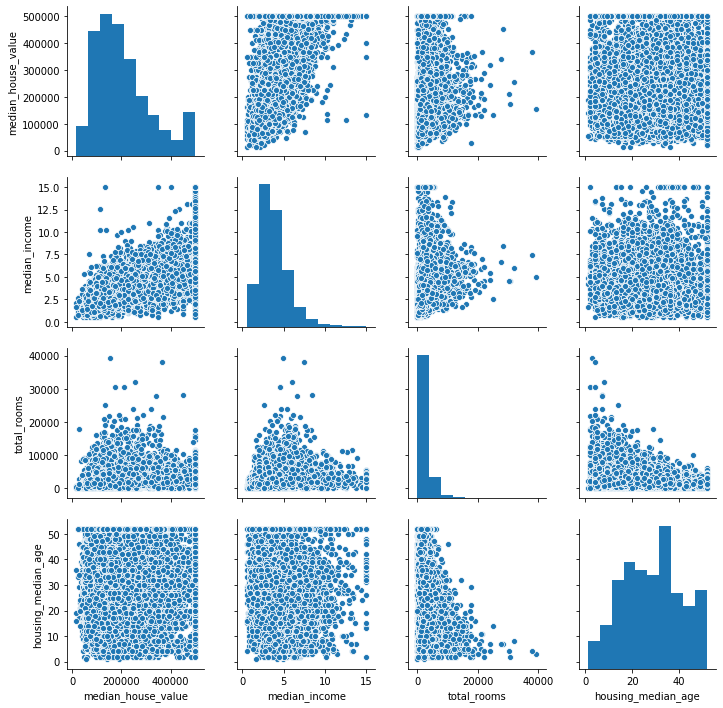

In [67]:
sns.pairplot(housing[attributes])

In [68]:
# from the corr_matrix and from the fig below, there is a strong correlation between median_house_value and the median_income

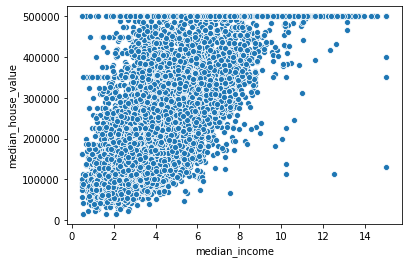

In [69]:
sns.scatterplot(data=housing,x="median_income",y="median_house_value")
#plt.savefig("income_vs_house_value_scatterplot")
plt.savefig(os.path.join(figures_filepath ,"income_vs_house_value_scatterplot"))

plt.show()



In [70]:
# correlation is indeed high and the points are not too dispersed. 
# The price cap is $ 500,000
# we observe straight line patterns at $450,000, another around $350,000, perhaps one around $280,000
# these districts may be removed so that algorithsm do not learn these data quirks

# some distributions have heavy-tail like distribution so we need to transform them by computing their logarithm

In [71]:


# Trying different Attributes Combinations...number of rooms is not useful if we do not know how many households are there
# we need number of rooms per household, similarly no of bedrooms compared to the number of rooms
# population per household is also an interesting attribute


In [72]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [73]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_rooms,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [74]:
# lookinf at correlation matrix again

corr_matrix=housing.corr()

In [75]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_rooms         -0.259984
Name: median_house_value, dtype: float64

In [76]:
# we get an imporovement with the combination of attributes. rooms_per_household has better correlation compared to 
# total_rooms and total_bedrooms. The more rooms,the expensive the house would be
# bedrooms_per_rooms attribute is much more correlated with the median house value than the total number of rooms or bedrooms

In [77]:
# Data Exploration is an iterative process. A prototype's output can be analyzed to come back for more insights

# Prepare the Data for ML algorithm 

In [78]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [79]:

# Data Cleaning
# Numerical Data
# Categorical data

In [80]:
# handling Numerical Data

housing_num=housing.drop("ocean_proximity",axis=1) # numerical values in the dataframe


In [81]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy='median')

imputer.fit(housing_num)
X=imputer.transform(housing_num)


In [82]:
# to check the missign values replaced with these values
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [83]:
# compare with the median values of housing
housing.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [84]:

# Now X is a numpy Array containing the transformed features
# to put it back into Pandas DataFrame

# housing_num   -  numerical is transformed to pandas dataframe

housing_tr =pd.DataFrame(X,columns=housing_num.columns)



In [85]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [86]:

#  Handling Categorical Data:

housing_cat=housing["ocean_proximity"] # categorical data

housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [87]:
s=pd.get_dummies(housing,columns=['ocean_proximity'])
s.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,1,0,0,0,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,1,0,0,0,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,0,0,0,0,1
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,0,1,0,0,0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,1,0,0,0,0


In [88]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
# Feature Scaling
S = sc_x.fit_transform(s)
#sc_y = StandardScaler()
#y = sc_y.fit_transform(y_train)
S


array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.0110063 ,
        -0.3548889 , -0.38421741],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.0110063 ,
        -0.3548889 , -0.38421741],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.0110063 ,
        -0.3548889 ,  2.60269309],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ..., -0.0110063 ,
        -0.3548889 , -0.38421741],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.0110063 ,
        -0.3548889 , -0.38421741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.0110063 ,
         2.81778327, -0.38421741]])

In [89]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded=labelencoder.fit_transform(housing_cat)


In [90]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [91]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [92]:
print(labelencoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [93]:
onehotencoder=OneHotEncoder(sparse=False)
housing_cat_1hot=onehotencoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

C:\Users\SonyTF\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [94]:
# Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you
# have categorical attributes with thousands of categories. After one-hot encoding we get a matrix with
# thousands of columns, and the matrix is full of zeros except for one 1 per row. Using up tons of memory
# mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the
# nonzero elements. You can use it mostly like a normal 2D array,but if you really want to convert it to a
# (dense) NumPy array, just call the toarray() method:

In [95]:
# We can also use label binarizer (2 step procedure in one shot)... converts categories --> integers -->one-hot vectors

from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
housing_cat_1hot_lb = labelbinarizer.fit_transform(housing_cat)
housing_cat_1hot_lb

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [96]:
# Note that this returns a dense NumPy array by default. You can get a sparse matrix instead by passing
# sparse_output=True to the LabelBinarizer constructor.

In [97]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [98]:
X  # from above------ X = imputer.transform(housing_num)


array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [99]:
# Scikit-Learn relies on duck typing (not inheritance), all you need is to create a class and implement three methods: 
# fit() (returning self), transform(), and fit_transform().

In [100]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room =True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self # nothing else to do
    def transform(self,X,y=None):
        rooms_per_household =X[:,rooms_ix]/X[:,household_ix]
        populations_per_household= X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_household=X[:,bedrooms_ix]/X[:,household_ix]
            return np.c_[X,rooms_per_household,populations_per_household,bedrooms_per_household]
        else:
            return np.c_[X,rooms_per_household,populations_per_household]
    
    
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)




In [101]:
#In this example the transformer has one hyperparameter, add_bedrooms_per_room, set to True by defaul

In [102]:
# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [list(housing.columns).index(col) 
                                                      for col in ("total_rooms", "total_bedrooms", "population", "households")]

In [103]:
[list(housing.columns).index(i) for i in ("total_rooms", "total_bedrooms", "population", "households")]

[3, 4, 5, 6]

In [104]:
from sklearn.preprocessing import FunctionTransformer
def add_extra_features(X,add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]
attr_adder = FunctionTransformer(add_extra_features, validate=False,kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)


In [105]:
# Change into DataFram for Housing_Extra_attribs 

In [106]:
housing_extra_attribs=pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)

In [107]:
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [108]:
# Now lets build a pipleline for preprocessing. There are quite a few transformation steps to be dealt in an order
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',FunctionTransformer(add_extra_features,validate=False)),
    ('std_sccaler',StandardScaler())
    ])

housing_num_tr=num_pipeline.fit_transform(housing_num)


In [109]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [110]:
# We have a piperline for numerical values and then there is categorical values. To merge these two there is FeatureUnion

In [111]:
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
    ])

housing_prepared=full_pipeline.fit_transform(housing)


In [112]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [113]:
housing_prepared.shape

(16512, 16)

# Select and Train a Model

In [114]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
# Let's try the full preprocessing pipeline on few 
some_data = housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


Comparing against the actual values

In [116]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [117]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [118]:
from sklearn.metrics import mean_squared_error

housing_predictions=lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [119]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels,housing_predictions)
lin_mae

49439.89599001897

In [120]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared,housing_labels)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [121]:
housing_predictions= tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse =np.sqrt(tree_mse)
tree_rmse

0.0

In [122]:
some_data = housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

print("Predictions:",tree_reg.predict(some_data_prepared))

Predictions: [286600. 340600. 196900.  46300. 254500.]


In [123]:
list(some_labels)

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]

In [124]:
# we can see the difference between the actual values and the predicted values in decision tree regressor too.
# The rmse is 0.0

# Fine Tune the model

In [125]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,
                      scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores= np.sqrt(-scores)

In [126]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


In [127]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345084
Standard deviation: 2731.6740017983466


Note: we specify n_estimators=10 to avoid a warning about the fact that the default value is going to change to 100

In [128]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [129]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [130]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean: 52583.72407377466
Standard deviation: 2298.353351147122
